In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

df = pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_9_Matyiashchyk\\data.csv", sep=',')


In [54]:
#Sprawdzenie danych tekstowych i liczbowych i zapisujemy do odpowiednich zmiennych
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [55]:
#Sprawdzenie braków
for var in categorical: 

    #print(df[var].value_counts()/np.float(len(df)))
    df1 = df.replace(' ?', np.NaN)
    #print(df1)
    df1.to_csv( "D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_9_Matyiashchyk\\NaN.csv", sep=',')

    df2 = df1[categorical].isnull().sum()
    df_workclass = df1['workclass'].isnull().sum()
    print(df_workclass)

1836
1836
1836
1836
1836
1836
1836
1836
1836


In [56]:
#Split data
from sklearn.model_selection import train_test_split
X = df1.drop(['income'], axis=1)
y = df1['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True) 
    #Sprawdzenie 
    df_native = df2.native_country.value_counts()
    df_occupation = df2.occupation.value_counts()
    #df_workclass = df2.workclass.value_counts()
    df_workclass = df2['workclass'].isnull().sum()
    print(df_workclass) 
    

0
0


In [57]:
#Feature engineering and scaling
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_test.shape

cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()


d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
y_test.value_counts()
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Model accuracy score: 0.8083
Training-set accuracy score: 0.8067
Training set score: 0.8067
Test set score: 0.8083
Null accuracy score: 0.7582


Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


<AxesSubplot: >

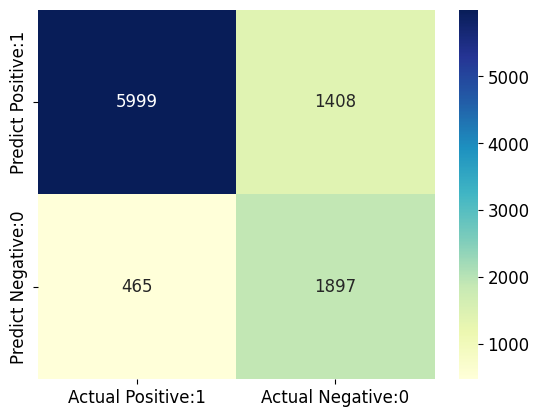

In [59]:
#Confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 

In [60]:
# Classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))


              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769

Classification accuracy : 0.8083
Classification error : 0.1917
Precision : 0.8099
Recall or Sensitivity : 0.9281
True Positive Rate : 0.9281
False Positive Rate : 0.4260
Specificity : 0.5740


[[9.99999426e-01 5.74152436e-07]
 [9.99687907e-01 3.12093456e-04]
 [1.54405602e-01 8.45594398e-01]
 [1.73624321e-04 9.99826376e-01]
 [8.20121011e-09 9.99999992e-01]
 [8.76844580e-01 1.23155420e-01]
 [9.99999927e-01 7.32876705e-08]
 [9.99993460e-01 6.53998797e-06]
 [9.87738143e-01 1.22618575e-02]
 [9.99999996e-01 4.01886317e-09]]
   Prob of - <=50K  Prob of - >50K
0     9.999994e-01    5.741524e-07
1     9.996879e-01    3.120935e-04
2     1.544056e-01    8.455944e-01
3     1.736243e-04    9.998264e-01
4     8.201210e-09    1.000000e+00
5     8.768446e-01    1.231554e-01
6     9.999999e-01    7.328767e-08
7     9.999935e-01    6.539988e-06
8     9.877381e-01    1.226186e-02
9     1.000000e+00    4.018863e-09


d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


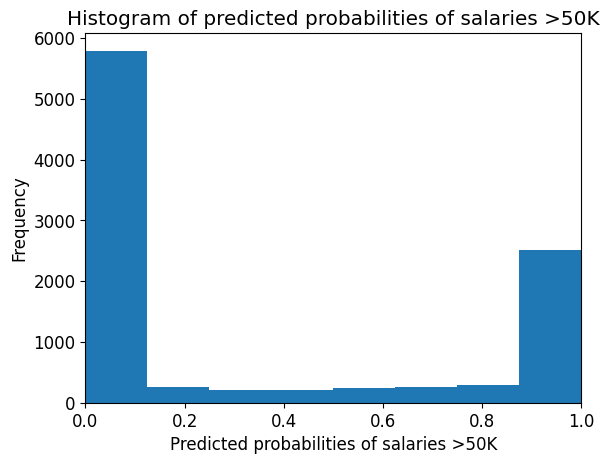

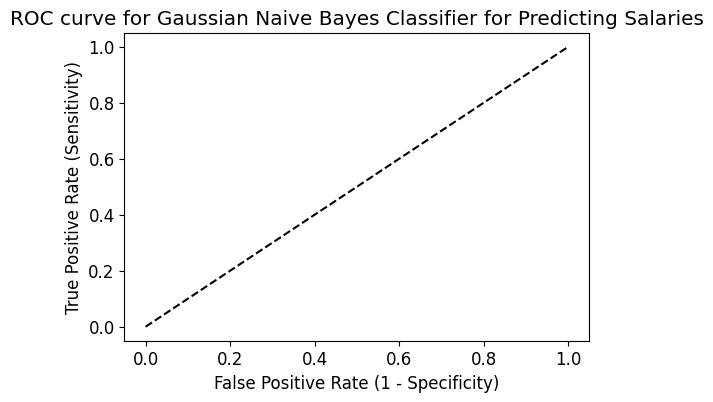

In [61]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
print(y_pred_prob)

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
print(y_pred_prob_df) 

gnb.predict_proba(X_test)[0:10, 1]

y_pred1 = gnb.predict_proba(X_test)[:, 1]
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 8)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=5)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [62]:
# ROC AUC is the percentage of the ROC plot that is underneath the curve.
#Validations
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

ROC AUC : 0.8941
Cross-validation scores:[0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]
Average cross-validation score: 0.8063
